In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## About this dataset
Age : Age of the patient
Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack 

In [2]:
# loading the data
df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
# how the dataset looks like
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking the datatypes of features and null values
#### As all the features are in int64 type except oldpeak, we do not need int64 we can store the values easily in int16. By doing this we can save 4X memory and computation power.

In [5]:
df=df.astype({'age':"int16", 'sex':"int16", 'cp':"int16", 'trtbps':"int16", 'chol':"int16", 'fbs':"int16", 'restecg':"int16", 'thalachh':"int16",
       'exng':"int16", 'oldpeak':"float16", 'slp':"int16", 'caa':"int16", 'thall':"int16", 'output':"int16"})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int16  
 1   sex       303 non-null    int16  
 2   cp        303 non-null    int16  
 3   trtbps    303 non-null    int16  
 4   chol      303 non-null    int16  
 5   fbs       303 non-null    int16  
 6   restecg   303 non-null    int16  
 7   thalachh  303 non-null    int16  
 8   exng      303 non-null    int16  
 9   oldpeak   303 non-null    float16
 10  slp       303 non-null    int16  
 11  caa       303 non-null    int16  
 12  thall     303 non-null    int16  
 13  output    303 non-null    int16  
dtypes: float16(1), int16(13)
memory usage: 8.4 KB


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.040039,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161133,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.799805,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.599609,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.199219,2.000000,4.000000,3.000000,1.000000


# EDA
## Univariate Analysis

### Age

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='age', ylabel='Density'>

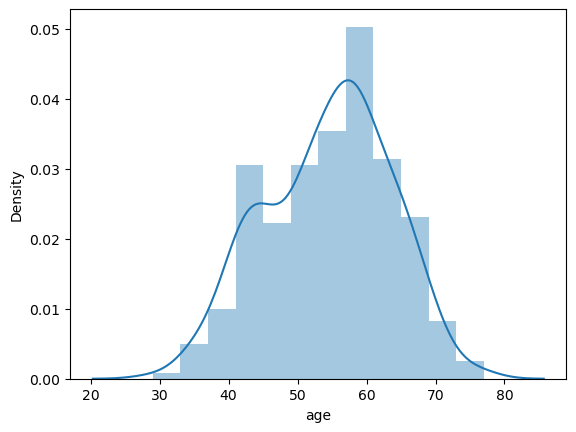

In [8]:
sns.distplot(df['age'])

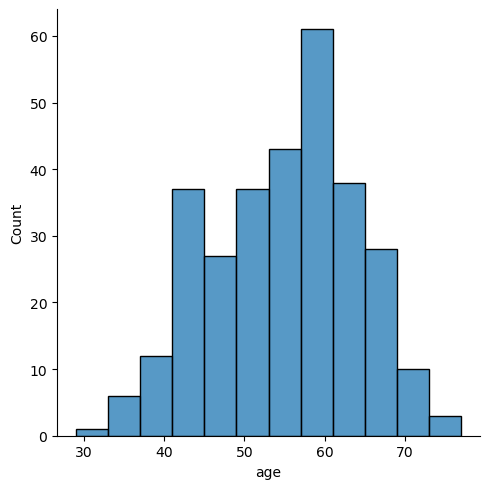

In [9]:
sns.displot(df['age'])

## Sex (Gender)

In [10]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:>

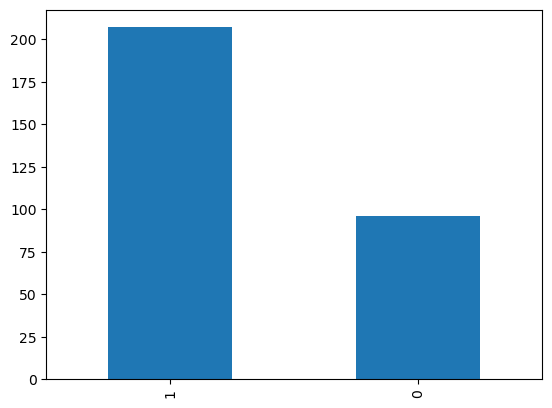

In [11]:
df['sex'].value_counts().plot(kind='bar')


## Chest Pain type (cp)

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic

In [12]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:>

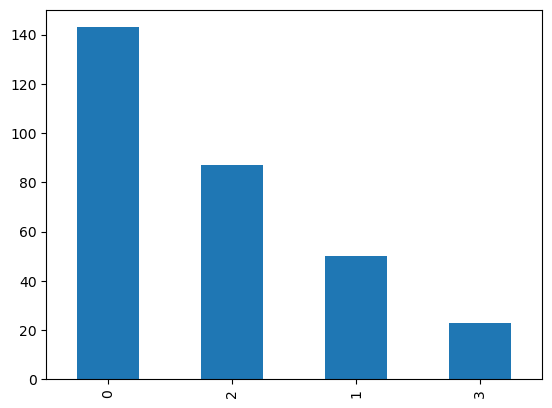

In [13]:
df['cp'].value_counts().plot(kind='bar')

## trtbps : resting blood pressure (in mm Hg)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='trtbps', ylabel='Density'>

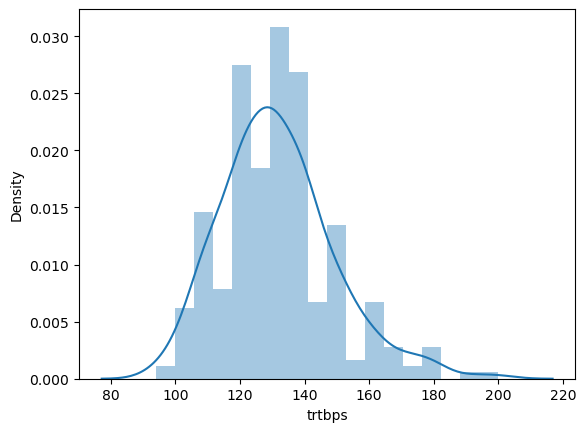

In [14]:
sns.distplot(df['trtbps'])

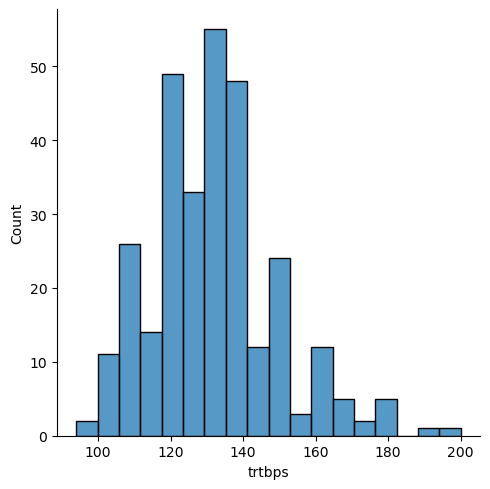

In [15]:
sns.displot(df['trtbps'],kind='hist')

### Cholestrol (chol)
cholestoral in mg/dl

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='chol', ylabel='Density'>

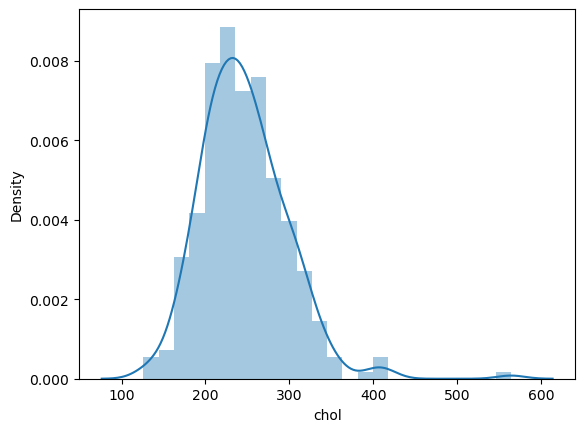

In [16]:
sns.distplot(df['chol'])

## fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

In [17]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

<AxesSubplot:>

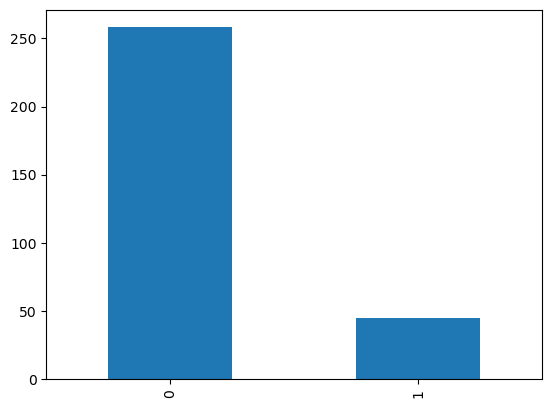

In [18]:
df['fbs'].value_counts().plot(kind='bar')

## restecg : resting electrocardiographic results

**Value 0: normal**

**Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)**

**Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria**

In [19]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

<AxesSubplot:>

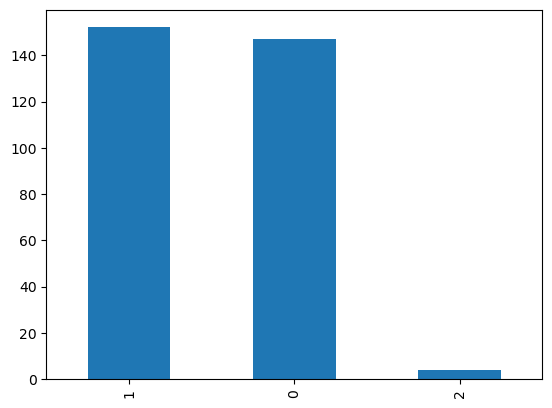

In [20]:
df['restecg'].value_counts().plot(kind='bar')

## thalachh : maximum heart rate achieved

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='thalachh', ylabel='Density'>

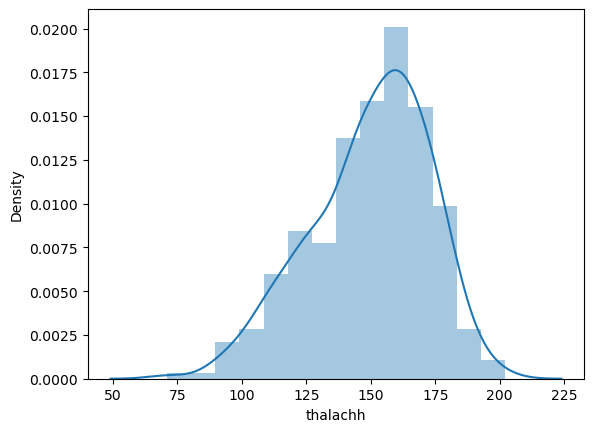

In [21]:
sns.distplot(df['thalachh'])

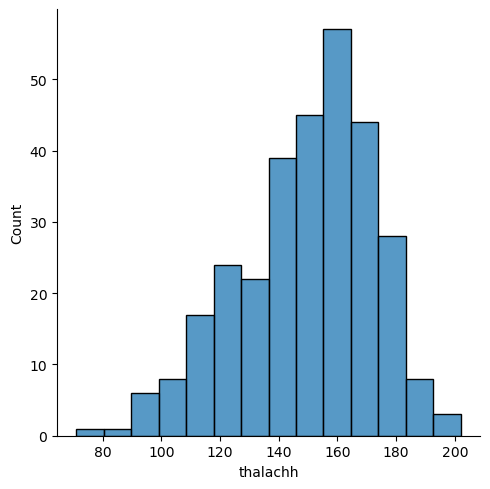

In [22]:
sns.displot(df['thalachh'])

## exng
exercise induced angina (1 = yes; 0 = no)

In [41]:
df['exng'].value_counts()

0    204
1     99
Name: exng, dtype: int64

<AxesSubplot:>

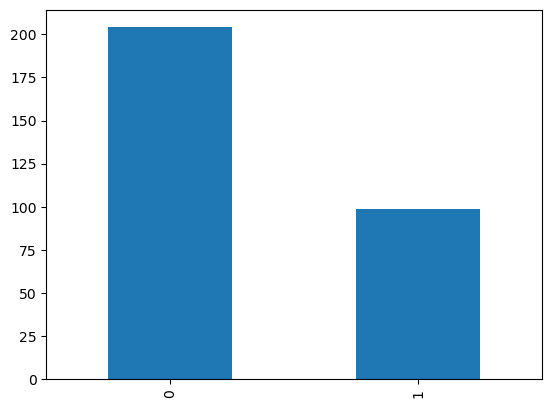

In [47]:
df['exng'].value_counts().plot(kind='bar')

## oldpeak
Previous peak

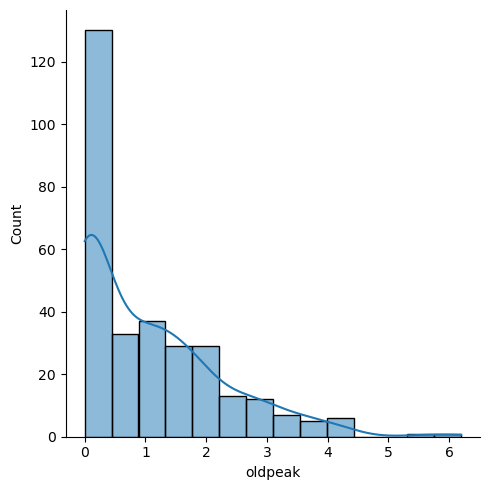

In [45]:
sns.displot(df['oldpeak'],kde=True)

## slp	
slope

In [49]:
df['slp'].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

<AxesSubplot:>

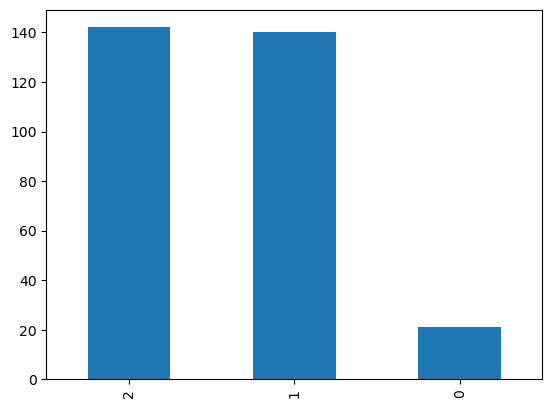

In [50]:
df['slp'].value_counts().plot(kind='bar')

## caa
number of major vessels (0-3)

In [52]:
df['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

<AxesSubplot:>

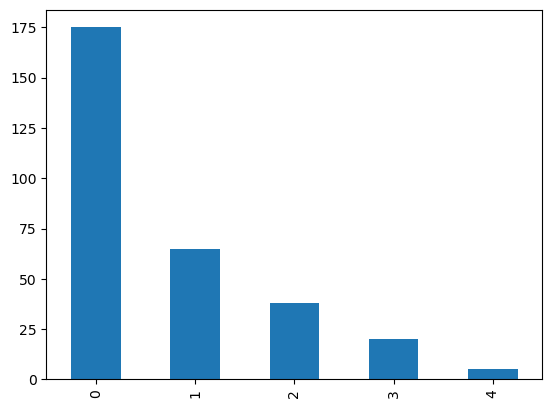

In [51]:
df['caa'].value_counts().plot(kind='bar')

## thall
Thal rate

In [53]:
df['thall'].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

<AxesSubplot:>

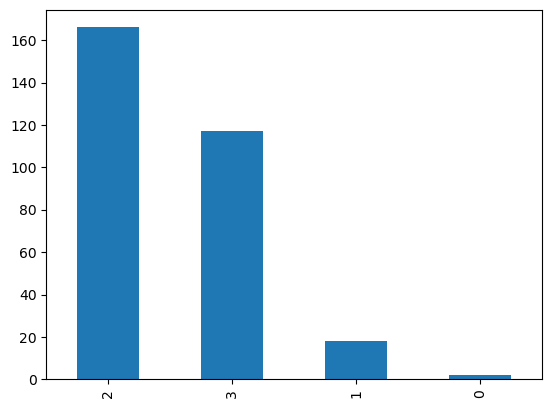

In [54]:
df['thall'].value_counts().plot(kind='bar')

## OUTPUT

In [23]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:>

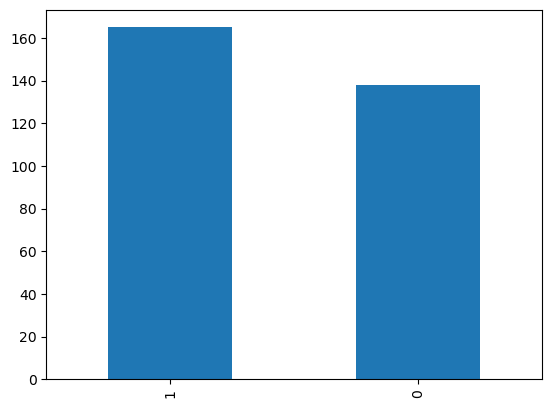

In [24]:
df['output'].value_counts().plot(kind='bar')

# Bivariate/Multivariate Analysis

## Pairplot

<Figure size 2500x2000 with 0 Axes>

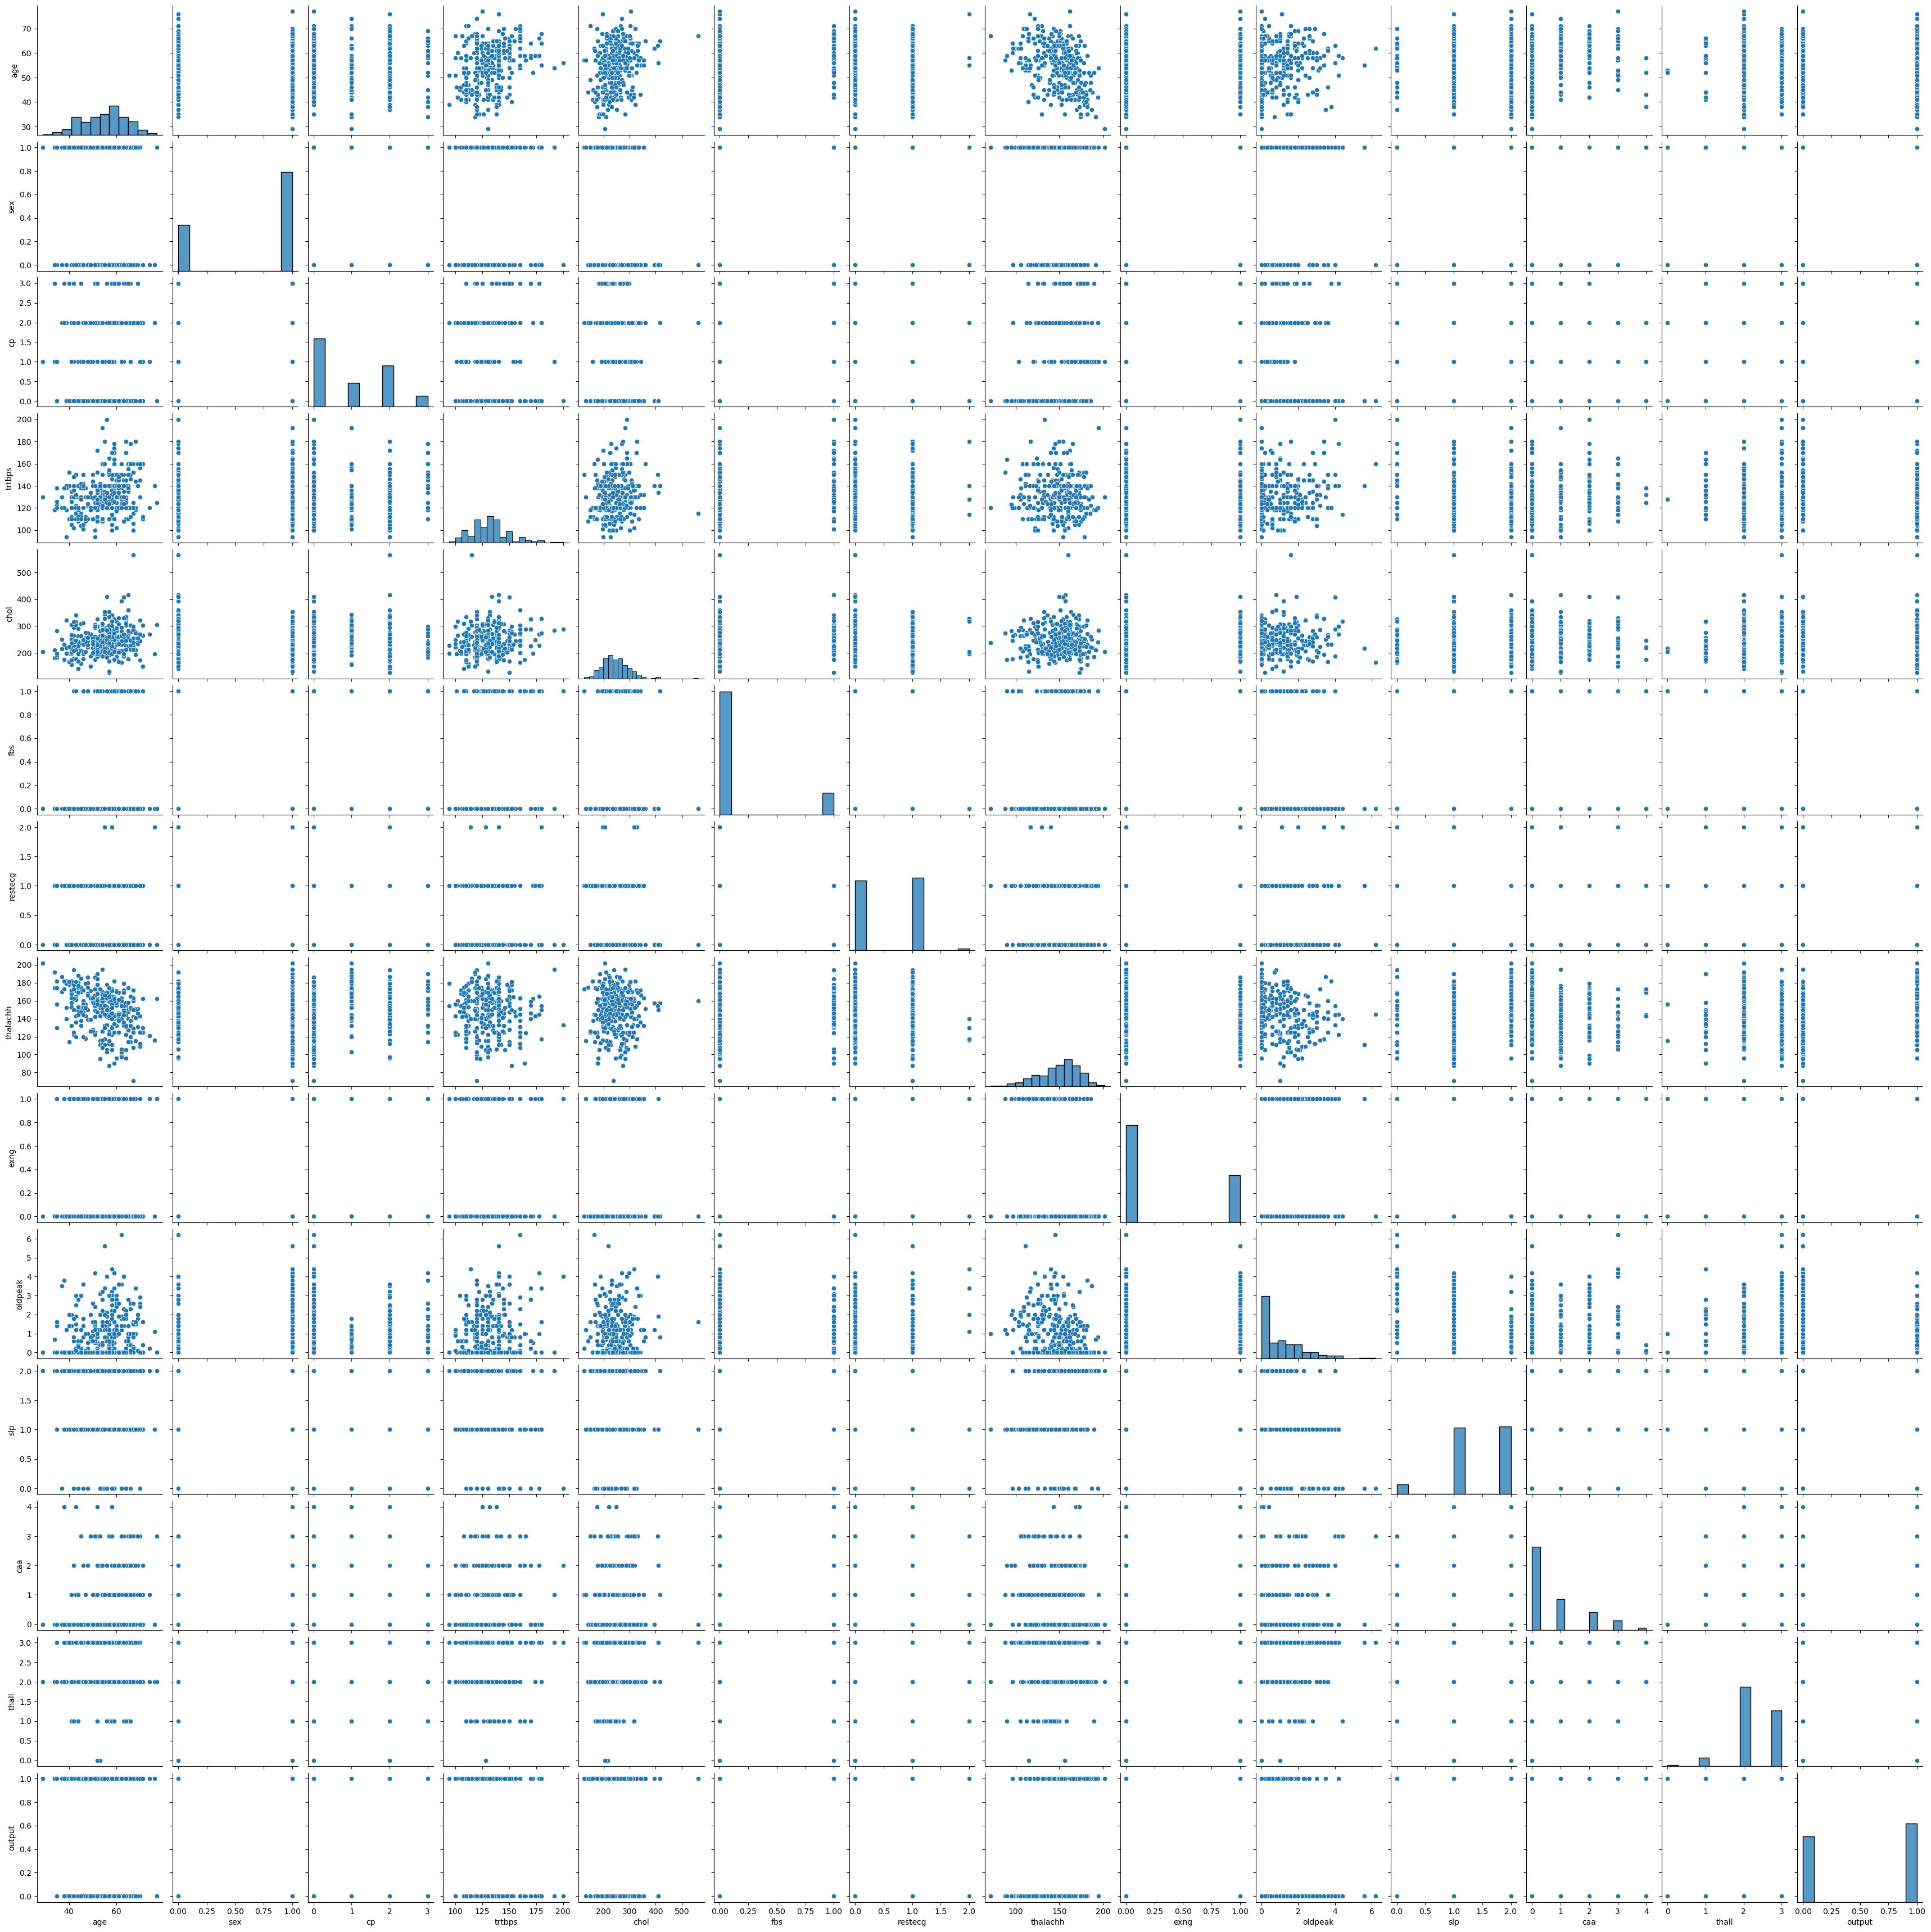

In [39]:
plt.figure(figsize=(25,20))
sns.pairplot(df)
plt.show()

## Violin Plot

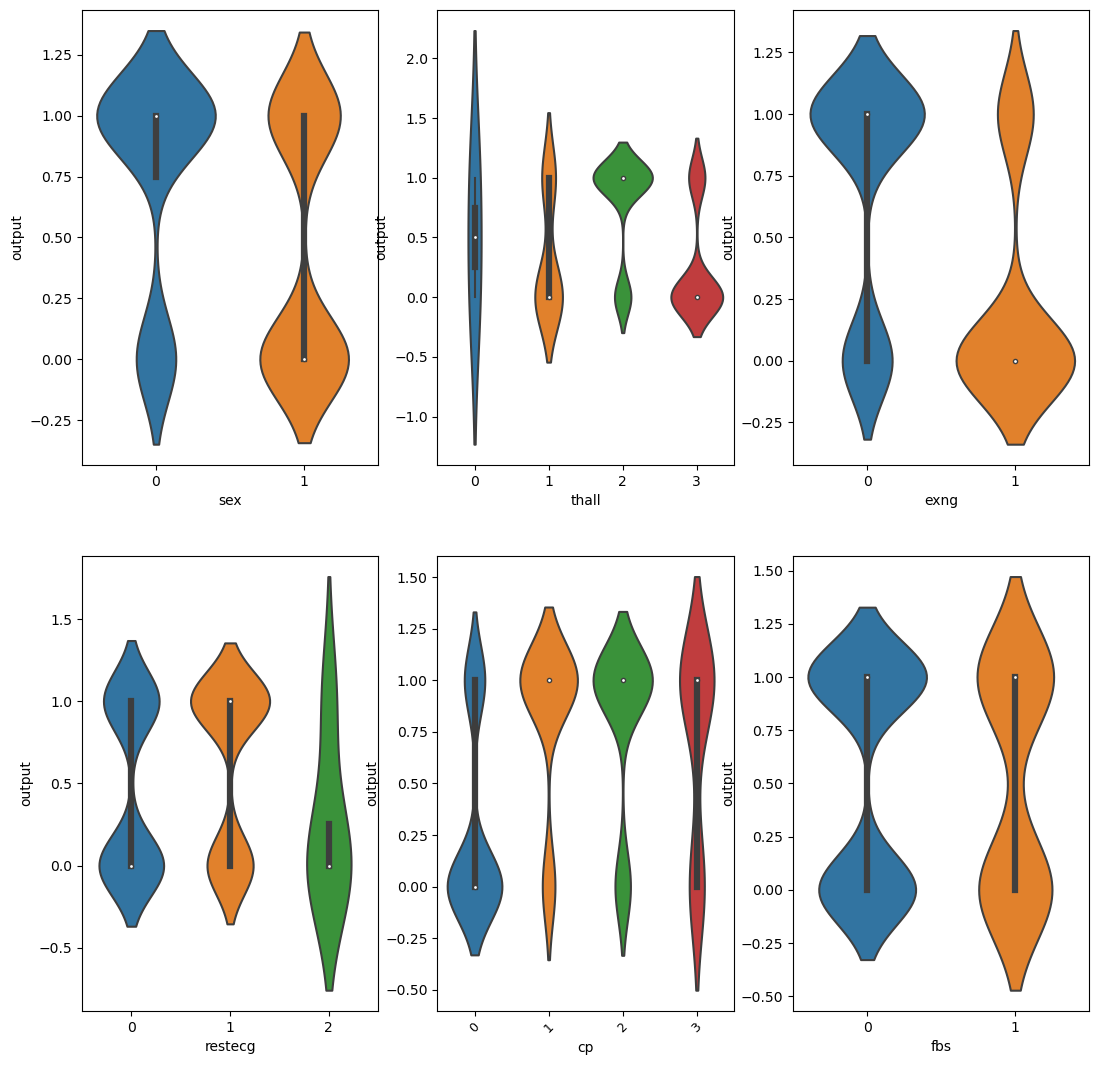

In [57]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = df)


plt.show()

## Correlation

In [25]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.209995,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096094,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149242,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193220,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053947,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005758,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058778,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344182,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288245,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.209995,0.096094,-0.149242,0.193220,0.053947,0.005758,-0.058778,-0.344182,0.288245,1.000000,-0.577534,0.222658,0.210250,-0.430699


## Observations from Correlation
the following features has positive correlation with the output;
1. cp
2. restecg
3. thalachh
4. slp

While other features has negative correlation.


In [26]:
x=df.iloc[:,0:13]
y=df.iloc[:,-1]

In [27]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.300781,0,0,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2
2,41,0,1,130,204,0,0,172,0,1.400391,2,0,2
3,56,1,1,120,236,0,1,178,0,0.799805,2,0,2
4,57,0,0,120,354,0,1,163,1,0.600098,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.199951,1,0,3
299,45,1,3,110,264,0,1,132,0,1.200195,1,0,3
300,68,1,0,144,193,1,1,141,0,3.400391,1,2,3
301,57,1,0,130,131,0,1,115,1,1.200195,1,1,3


In [28]:
Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

## Scaling the Data

In [29]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(Xtrain)
xtest_scaled=scaler.transform(Xtest)


In [30]:
svc=SVC()
svc.fit(xtrain_scaled,ytrain)
pred=svc.predict(xtest_scaled)

In [31]:
accuracy_score(ytest,pred)

0.8852459016393442

In [32]:
model = LogisticRegression()
model.fit(xtrain_scaled, ytrain)
predicted=model.predict(xtest_scaled)
conf = confusion_matrix(ytest, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(ytest, predicted)*100, "%")

Confusion Matrix : 
 [[25  7]
 [ 1 28]]


The accuracy of Logistic Regression is :  86.88524590163934 %


In [33]:
model = GaussianNB()
model.fit(xtrain_scaled, ytrain)
  
predicted = model.predict(xtest_scaled)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(ytest, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  88.52459016393442 %


In [34]:
model = BernoulliNB()
model.fit(xtrain_scaled, ytrain)
  
predicted = model.predict(xtest_scaled)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(ytest, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  88.52459016393442 %


In [35]:
model = RandomForestRegressor(n_estimators = 800, random_state = 2)  
model.fit(xtrain_scaled, ytrain)  
predicted = model.predict(xtest_scaled)
print("The accuracy of Random Forest is : ", accuracy_score(ytest, predicted.round())*100, "%")

The accuracy of Random Forest is :  90.1639344262295 %


In [36]:
model = KNeighborsClassifier(n_neighbors = 26)  
model.fit(xtrain_scaled, ytrain)
predicted = model.predict(xtest_scaled)
  

print(confusion_matrix(ytest, predicted))
print("The accuracy of KNN is : ", accuracy_score(ytest, predicted.round())*100, "%")

[[26  6]
 [ 0 29]]
The accuracy of KNN is :  90.1639344262295 %


In [37]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(xtrain_scaled, ytrain)
   
predicted = model.predict(xtest_scaled)
   
cm = confusion_matrix(ytest, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(ytest, predicted)*100, "%")


The accuracy of X Gradient Boosting is :  85.24590163934425 %
